<a href="https://colab.research.google.com/github/NeverSxrrender9/Machine-Learning-with-Python/blob/main/Clasificador%20de%20D%C3%ADgitos%20Manuscritos%20con%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar el dataset MNIST
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos (de 0-255 a 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Crear el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convertir imagen 28x28 a un vector
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y ReLU
    keras.layers.Dense(10, activation='softmax')  # Capa de salida (10 clases)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Entrenar el modelo
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8767 - loss: 0.4366
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9642 - loss: 0.1203
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9760 - loss: 0.0800
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9827 - loss: 0.0570
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9874 - loss: 0.0421


In [6]:
# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nPrecisión en datos de prueba:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.0903

Precisión en datos de prueba: 0.9746000170707703


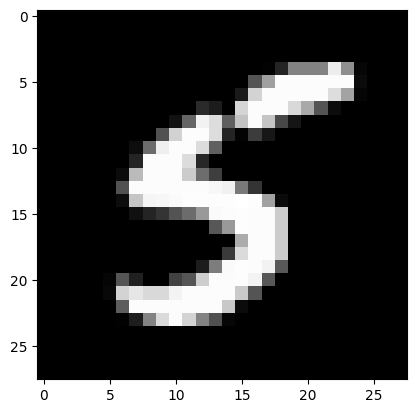

In [8]:
# Probar con una imagen aleatoria del dataset
idx = np.random.randint(0, len(x_test))
plt.imshow(x_test[idx], cmap='gray')
plt.show()

In [9]:
# Predecir la clase
prediction = np.argmax(model.predict(x_test[idx].reshape(1, 28, 28)))
print("Predicción del modelo:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicción del modelo: 5
